In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
carsAccident = pd.read_csv("si_env-2020.csv", sep=';', encoding='ISO-8859-1')

### OVERVIEW OF THE DATASET

In [3]:
carsAccident.shape
carsAccident.head(10)

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,,...,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N
5,2020-014161105-001,20/03/2020 06:48,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,29,16/06/1990,AE,HABILITADO NAS CATEGORIAS A e E ...,0,0,ONIBUS,N,N
6,2020-014161105-001,20/03/2020 06:48,2,S,1,NAO FATAL,F,SIM,NÃO,33,08/01/1987,AB,HABILITADO NAS CATEGORIAS A e B ...,0,0,AUTOMOVEL,N,N
7,2020-014161105-001,20/03/2020 06:48,3,N,1,NAO FATAL,M,SIM,NÃO,39,07/03/1981,,...,0,0,AUTOMOVEL,N,S
8,2020-014164137-001,20/03/2020 07:08,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,30,09/12/1989,C,"VEIC. MOTOR. P/ TRANSP. DE CARGA, C/ PESO MAX....",0,0,AUTOMOVEL,N,N
9,2020-014164137-001,20/03/2020 07:08,2,S,1,NAO FATAL,M,SIM,NÃO,37,12/06/1982,N,NAO INFORMADO ...,0,0,MOTOCICLETA,N,N


### RENAMING THE COLUMNS IN ENGLISH

In [4]:
columns = carsAccident.columns
print(columns)

Index(['num_boletim', ' data_hora_boletim', ' Nº_envolvido', ' condutor',
       ' cod_severidade', ' desc_severidade', ' sexo', ' cinto_seguranca',
       ' Embreagues', ' Idade', ' nascimento', ' categoria_habilitacao',
       ' descricao_habilitacao', ' declaracao_obito', ' cod_severidade_antiga',
       'especie_veiculo', ' pedestre', ' passageiro'],
      dtype='object')


In [5]:
#to make columns readable and understandable
english_column_names = [
    'Accident_Record_Number',
    'Date_and_Time_of_Registration',
    'Number_of_People_Involved',
    'Driver_Responsible_For_Accident',
    'Severity_Code',
    'Severity_Description',
    'Person_Sex',
    'Seatbelt_Used',
    'Driver_Under_Influence_of_Alcohol',
    'Age',
    'Birth_Date',
    'License_Category',
    'License_Description',
    'Death_Count',
    'Old_Severity_Code',
    'Vehicle_Type',
    'Pedestrian_Involved',
    'Passenger_Present'
]
carsAccident.columns = english_column_names
carsAccident.head(3)

,Accident_Record_Number,Date_and_Time_of_Registration,Number_of_People_Involved,Driver_Responsible_For_Accident,Severity_Code,Severity_Description,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Birth_Date,License_Category,License_Description,Death_Count,Old_Severity_Code,Vehicle_Type,Pedestrian_Involved,Passenger_Present
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S


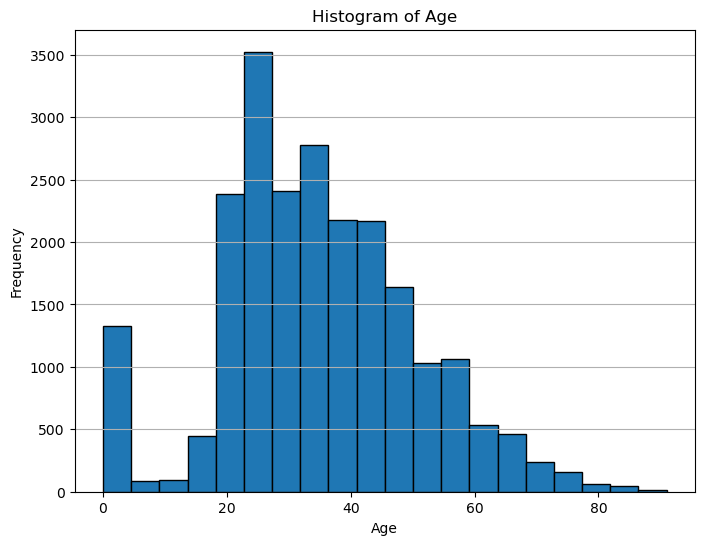

In [6]:
# Create a histogram for 'Age'
plt.figure(figsize=(8, 6))
plt.hist(carsAccident['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(axis='y')
plt.show()

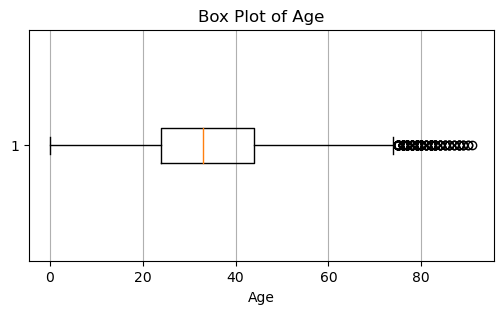

In [7]:
# Create a box plot for the 'Age' variable
plt.figure(figsize=(6, 3))
plt.boxplot(carsAccident['Age'], vert=False)  # vert=False for horizontal box plot
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.grid(axis='x')
plt.show()

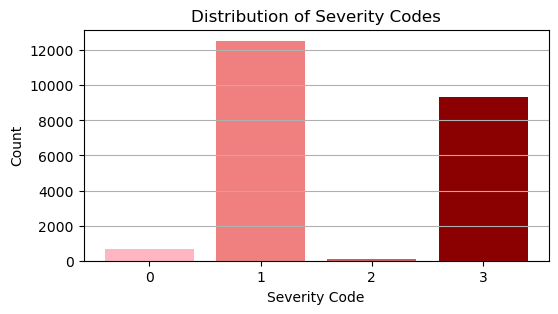

In [8]:
# Define custom colors for each bar
severity_colors = ['lightpink', 'lightcoral', 'indianred', 'darkred']

# Create a bar chart for Severity_Code
severity_counts = carsAccident['Severity_Code'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
plt.bar(severity_counts.index, severity_counts.values, color=severity_colors)
plt.xlabel('Severity Code')
plt.ylabel('Count')
plt.title('Distribution of Severity Codes')
plt.xticks(severity_counts.index)
plt.grid(axis='y')
plt.show()

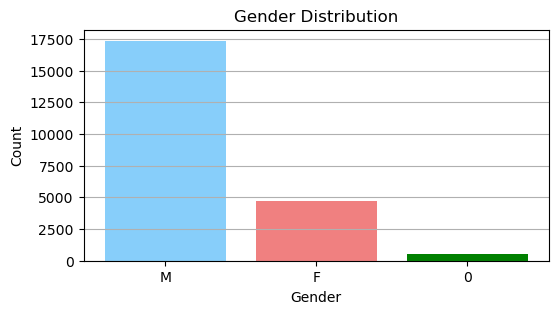

In [9]:
# Define custom colors for each bar
gender_colors = ['lightskyblue', 'lightcoral','green']

# Create a bar chart for gender distribution
gender_counts = carsAccident['Person_Sex'].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(gender_counts.index, gender_counts.values, color=gender_colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(axis='y')

# Optionally, you can rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

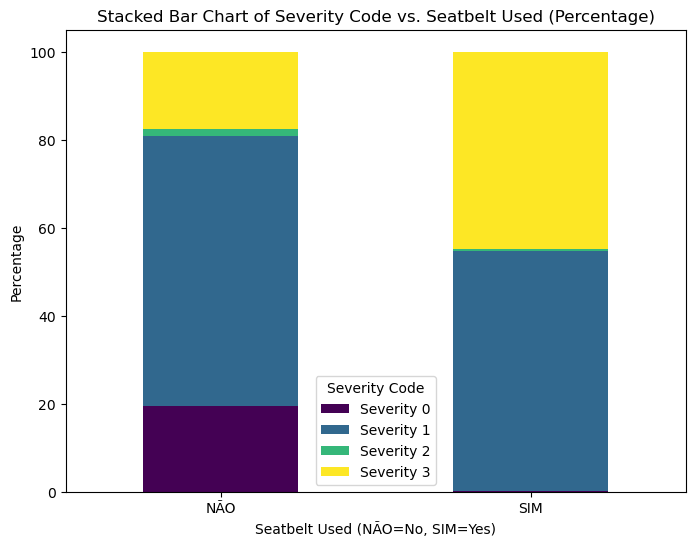

In [10]:
# Calculate percentages
total_counts = carsAccident.groupby('Seatbelt_Used').size()
grouped_data = carsAccident.groupby(['Seatbelt_Used', 'Severity_Code']).size().unstack(fill_value=0)
grouped_data_percent = grouped_data.div(total_counts, axis=0) * 100  # Calculate percentages

# Plot the stacked bar chart with percentages
ax = grouped_data_percent.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.xlabel('Seatbelt Used (NÃO=No, SIM=Yes)')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Severity Code vs. Seatbelt Used (Percentage)')
plt.xticks(rotation=0)

# Add legend
severity_labels = ['Severity {}'.format(code) for code in grouped_data.columns]
plt.legend(severity_labels, title='Severity Code')

plt.show()

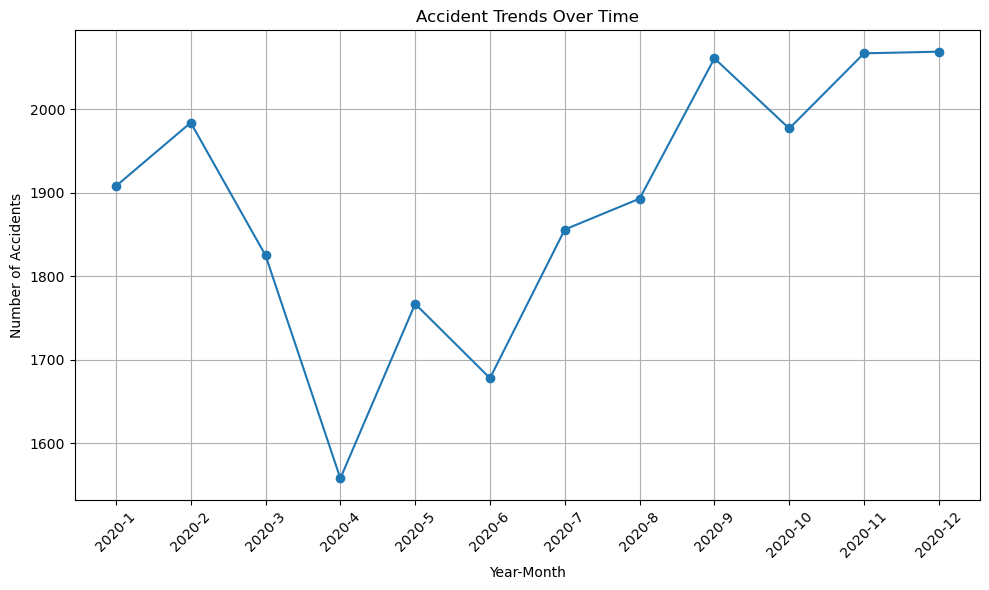

In [11]:
# Convert the 'Date_and_Time_of_Registration' column to a datetime object
carsAccident['Date_and_Time_of_Registration'] = pd.to_datetime(carsAccident['Date_and_Time_of_Registration'])

# Extract year and month from the date column
carsAccident['Year'] = carsAccident['Date_and_Time_of_Registration'].dt.year
carsAccident['Month'] = carsAccident['Date_and_Time_of_Registration'].dt.month

# Group the data by year and month and count the number of accidents
monthly_accidents = carsAccident.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents['Year'].astype(str) + '-' + monthly_accidents['Month'].astype(str), monthly_accidents['Accident_Count'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')
plt.title('Accident Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

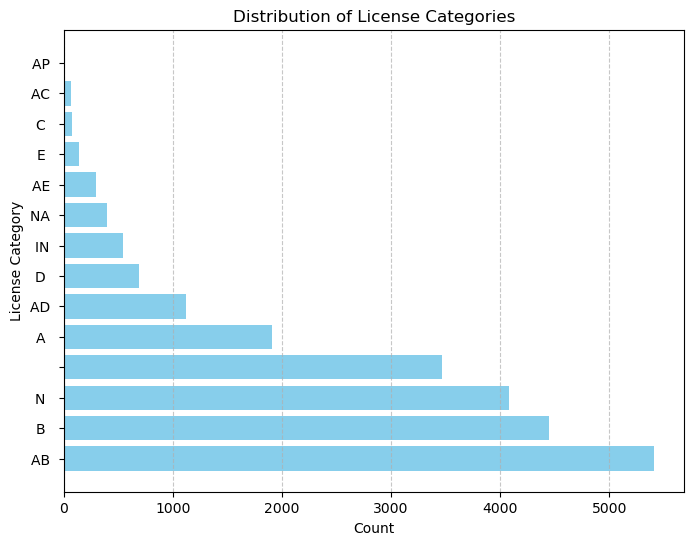

In [12]:
# Count the occurrences of each license category
license_counts = carsAccident['License_Category'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(license_counts.index, license_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('License Category')
plt.title('Distribution of License Categories')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

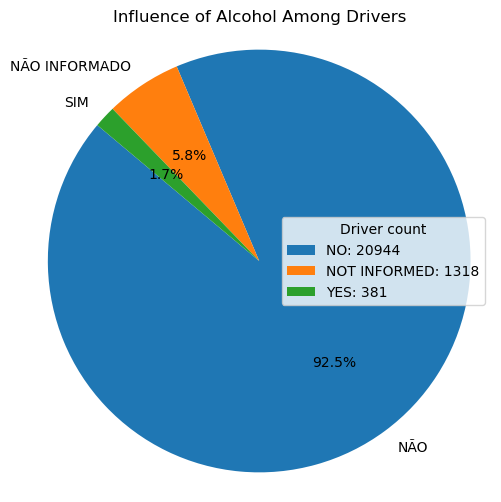

In [13]:
# Count the occurrences of drivers under the influence of alcohol
alcohol_counts = carsAccident['Driver_Under_Influence_of_Alcohol'].value_counts()

# Map Portuguese values to English
english_values = {
    'NÃO': 'NO',
    'SIM': 'YES',
    'NÃO INFORMADO': 'NOT INFORMED'
}

# Replace Portuguese values with English using the get method with a default value
carsAccident['Driver_Under_Influence_of_Alcohol'] = carsAccident['Driver_Under_Influence_of_Alcohol'].apply(lambda x: english_values.get(x, x))

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Influence of Alcohol Among Drivers')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Create a legend with translated values
legend_labels = [f"{english_values.get(val, val)}: {count}" for val, count in alcohol_counts.items()]
plt.legend(legend_labels, title='Driver count', loc='best')

plt.show()